In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fn="../prices.txt"
df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
prices = (df.values).T

nInst ,T = 50,750

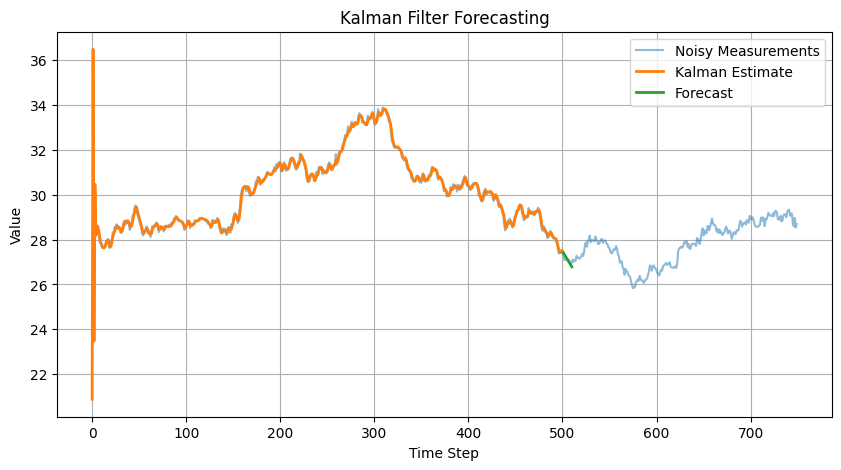

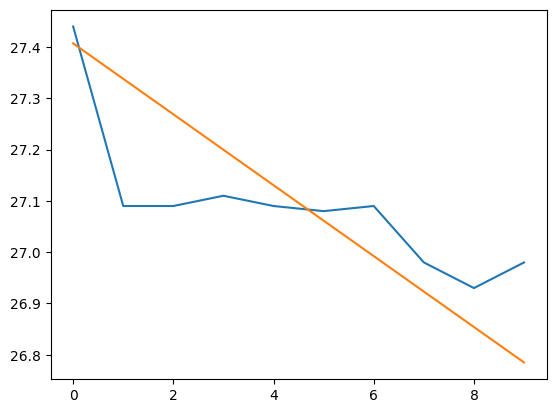

27.476143702411118 -0.06911884813721945


In [38]:
# Simulate a 1D system: constant velocity + noise

instID = 5
instPrice = prices[instID]


stop = 501
measurements = instPrice[:stop]

# Kalman filter setup
x = 0.0           # initial estimate
v = 0.5           # initial velocity
P = 1.0           # initial uncertainty
Q = 0.05         # process noise (model uncertainty)
R = 4           # measurement noise
A = 1.0           # state transition (no change to state, just incremented by v)
H = 1.0           # measurement matrix
x_estimates = []

for z in measurements:
    # Predict step
    x = x + v               # predict next state
    P = P + Q               # update uncertainty

    # Update step
    v = P * (z-x) 
    K = P / (P + R)          # Kalman gain
    x = x + K * (z - x) + v/2     # update estimate
    P = (1 - K) * P         # update uncertainty

    x_estimates.append(x)

# Forecast future steps
n = len(measurements)
future_steps = 10
forecast = [x + v * i for i in range(1, future_steps + 1)]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(instPrice, label='Noisy Measurements', alpha=0.5)
plt.plot(x_estimates, label='Kalman Estimate', linewidth=2)
plt.plot(np.arange(n, n+future_steps), forecast, label='Forecast', linewidth=2)
plt.legend()
plt.title("Kalman Filter Forecasting")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.grid(True)
plt.show()


plt.plot(instPrice[n:n+future_steps],label="true")
plt.plot(forecast,label="forecast")
plt.show()

print(x,v,)

pykalman setup

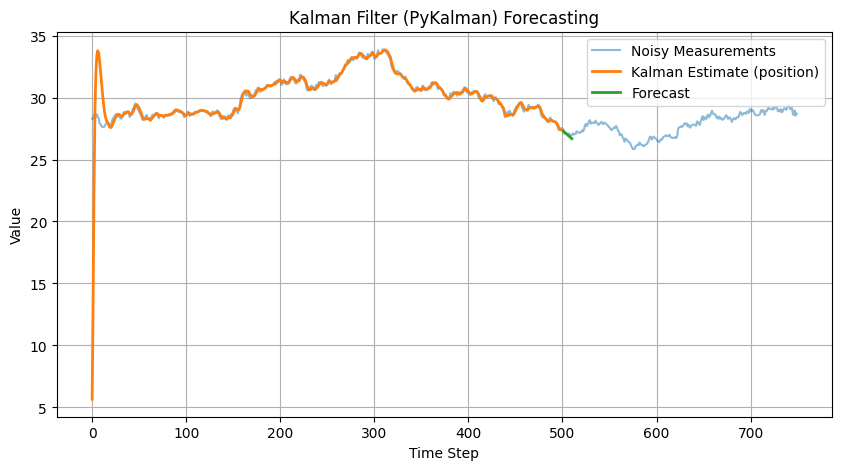

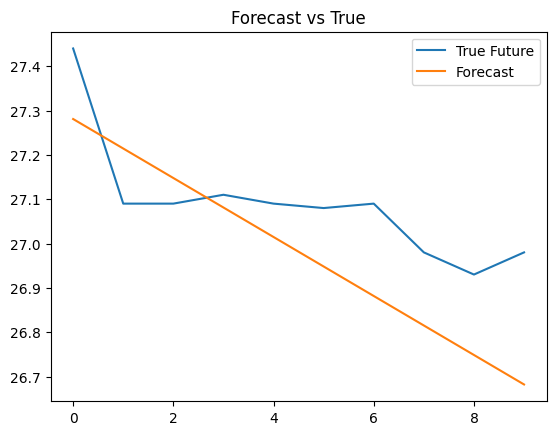

Final Estimated Position: 27.35, Velocity: -0.07


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Your data
instID = 5
instPrice = prices[instID]
stop = 501
measurements = instPrice[:stop]

# Define the Kalman Filter model
kf = KalmanFilter(
    transition_matrices=np.array([[1, 1],   # x_t = x_{t-1} + v_{t-1}
                                  [0, 1]]), # v_t = v_{t-1}
    observation_matrices=np.array([[1, 0]]),  # we only observe position
    initial_state_mean=np.array([0, 0.5]),   # initial [position, velocity]
    initial_state_covariance=np.eye(2),      # uncertainty in initial guess
    transition_covariance=np.array([[0.05, 0],  # process noise Q
                                    [0, 0.05]]),
    observation_covariance=np.array([[4]])    # measurement noise R
)

# Apply Kalman filter to measurements
state_means, state_covs = kf.filter(measurements)
positions = state_means[:, 0]
velocities = state_means[:, 1]

# Forecast future steps
future_steps = 10
last_pos = positions[-1]
last_vel = velocities[-1]
forecast = [last_pos + last_vel * i for i in range(1, future_steps + 1)]

# Plot filtered estimate
plt.figure(figsize=(10, 5))
plt.plot(instPrice, label='Noisy Measurements', alpha=0.5)
plt.plot(positions, label='Kalman Estimate (position)', linewidth=2)
plt.plot(np.arange(stop, stop + future_steps), forecast, label='Forecast', linewidth=2)
plt.legend()
plt.title("Kalman Filter (PyKalman) Forecasting")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Forecast vs actual
plt.plot(instPrice[stop:stop+future_steps], label="True Future")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.title("Forecast vs True")
plt.show()

print(f"Final Estimated Position: {last_pos:.2f}, Velocity: {last_vel:.2f}")
